In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import sklearn.pipeline
import sklearn
import xgboost as xgb
import warnings

In [319]:
def load_micro_data(country = 'IT'):
    data = pd.read_pickle('Erasmus_data_stresstesting_2024.pickle')
    country_data = data[data['country_code']== country].reset_index()

    l = []
    x = [country_data.isna().sum() < 20_000]
    for i in range(len([country_data.isna().sum() < 20_000][0])):
        l.append(x[0][i])
    df2 = country_data.loc[:, l].dropna()

    #df = df2[df2['country_code']== country].reset_index()

    return df2

In [320]:
def merge_macro_micro(country_data, file = 'ITALY_df.xlsx'):
    macro = pd.read_excel(file) 

    # FOR NOW, remove missing values (tbd) and use the rest
    macro = macro.iloc[:-2, :-11]

    # Merge country data with respective macro factors (think about lagging the macro factors)
    macro = macro.rename(columns = {'year': 'status_year'}) #change name of year column to join easily
    full_data = pd.merge(country_data,macro, on = 'status_year', how = 'inner') # contains both micro and macro

    return full_data

In [4]:
data = pd.read_pickle('Erasmus_data_stresstesting_2024.pickle')

In [321]:
df = load_micro_data()
df = merge_macro_micro(df)

In [370]:
micro = load_micro_data()

In [343]:
micro

,level_0,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,...,extr_and_other_revenue_0,extr_and_other_expenses_0,extr_and_other_pl_0,pl_for_period_net_income_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0,ebitda_0
0,9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,...,0.0,0.0,0.0,60611.0,5502125.0,507938.0,136504.0,10463.0,197115.0,294436.0
1,10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,...,0.0,0.0,0.0,110276.0,5191586.0,502907.0,109947.0,8737.0,220223.0,323697.0
2,11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,...,0.0,0.0,0.0,562993.0,5095473.0,416276.0,71708.0,14449.0,634701.0,890388.0
3,12,7000907,IT02969620133,IT,G,SME,2017,16991231,non_default,0,...,0.0,0.0,0.0,109087.0,3533314.0,301781.0,55419.0,8288.0,164506.0,198487.0
4,16,7003402,IT05253550965,IT,J,SME,2014,16991231,non_default,0,...,9164.0,0.0,9164.0,1061759.0,65006.0,362584.0,328387.0,9672.0,1390146.0,2025047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305519,1526917,430272630,IT00726060155,IT,C,SME,2011,16991231,non_default,1,...,99254.0,1.0,99253.0,6210.0,1684879.0,1688180.0,262980.0,198422.0,269190.0,405457.0
305520,1526923,86196217,IT01588300465,IT,G,SME,2017,16991231,non_default,0,...,0.0,0.0,0.0,-224873.0,4041689.0,892743.0,64845.0,93346.0,-160028.0,-61327.0
305521,1526925,233482640,IT01998880486,IT,G,SME,2013,16991231,non_default,0,...,4492.0,0.0,4492.0,-73872.0,7346121.0,490667.0,118972.0,6822.0,45100.0,37583.0
305522,1526940,430282806,IT00735460347,IT,G,SME,2010,16991231,non_default,0,...,1285552.0,101788.0,1183764.0,221392.0,7095099.0,475913.0,85398.0,136598.0,306790.0,-786846.0


In [35]:
df = pd.read_csv('imputed_MICE_bayesian_ridge.csv').iloc[:, 1:]

In [30]:
micro.to_csv('micro.csv')

In [415]:
df

,intangible_fixed_assets_0,intangible_fixed_assets_1,tangible_fixed_assets_0,tangible_fixed_assets_1,other_fixed_assets_0,other_fixed_assets_1,stock_0,stock_1,debtors_0,debtors_1,...,material_costs_0,material_costs_1,costs_of_employees_0,costs_of_employees_1,depreciation_amortization_0,depreciation_amortization_1,interest_paid_0,cash_flow_0,cash_flow_1,added_value_0
0,2905.0,9624.000000,65007.0,8.164000e+04,5000.0,5000.000000,8.919340e+05,9.047550e+05,0.0,0.000000e+00,...,5.158095e+06,4.674118e+06,1.418751e+06,1.239062e+06,96134.722236,4.018728e+05,87374.807074,392462.733889,666955.173857,1.960535e+06
1,0.0,0.000000,0.0,0.000000e+00,1543.0,2246.000000,1.546495e+06,5.213670e+06,2774780.0,2.334663e+06,...,7.839497e+06,8.456265e+06,3.307300e+04,2.818300e+04,83564.202904,1.128200e+04,1078.000000,154.000000,11381.000000,3.432300e+04
2,819427.0,651498.000000,559611.0,4.110480e+05,5000.0,5000.000000,2.690780e+05,1.359560e+05,398247.0,4.073180e+05,...,5.502125e+06,5.191586e+06,5.079380e+05,5.029070e+05,136504.000000,1.099470e+05,10463.000000,197115.000000,220223.000000,8.147850e+05
3,651498.0,672129.000000,411048.0,4.163990e+05,5000.0,5000.000000,1.359560e+05,1.409340e+05,407318.0,0.000000e+00,...,5.191586e+06,5.207861e+06,5.029070e+05,4.600000e+05,109947.000000,1.605010e+05,8737.000000,220223.000000,263278.000000,8.349610e+05
4,3546.0,7589.000000,855583.0,7.956130e+05,66685.0,66685.000000,2.177220e+05,2.113480e+05,3539335.0,3.170124e+06,...,5.095473e+06,4.372782e+06,4.162760e+05,3.436360e+05,71708.000000,5.708900e+04,14449.000000,634701.000000,338217.000000,1.313014e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,24082.0,27427.000000,193549.0,2.156860e+05,0.0,0.000000,1.396975e+06,1.076294e+06,106373.0,1.521260e+05,...,5.942672e+06,7.278689e+06,2.442320e+05,2.255810e+05,33524.000000,3.078100e+04,1480.000000,215824.000000,348545.000000,5.941470e+05
1075922,32131.0,30273.000000,5483.0,2.616430e+05,5140.0,5648.000000,0.000000e+00,0.000000e+00,43385.0,2.882240e+05,...,3.933256e+06,4.084650e+06,1.306358e+06,1.462834e+06,196702.872101,3.708686e+05,39008.000000,507374.130052,380631.223539,1.859245e+06
1075923,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,3.243740e+05,2.330610e+05,27463.0,7.754700e+04,...,4.287983e+06,3.613830e+06,1.362447e+06,1.169596e+06,255903.667520,1.833364e+05,55881.601089,357119.235116,-120673.667210,1.809687e+06
1075924,0.0,0.000000,24010.0,2.038300e+04,0.0,0.000000,1.287428e+07,8.334401e+06,0.0,0.000000e+00,...,4.280957e+06,1.009106e+07,7.011728e+05,2.313912e+06,-266546.715536,2.293152e+06,-2455.943433,311396.885453,259391.073334,1.161787e+06


: 

# GET TRAIN TEST DATA

In [16]:
def calculate_woe(df, feature, target):
    '''
    Calculate Weight of Evidence (WoE) for a categorical variable.
    
    Parameters:
    - df: DataFrame containing the data
    - feature: Name of the categorical variable
    - target: Name of the target variable
    
    Returns:
    - Dictionary containing WoE values for each category of the feature
    '''
    # Create a DataFrame to hold the calculation results
    df_woe = pd.DataFrame()
    
    # Calculate the total count of positive and negative instances
    total_positive = df[target].sum()
    total_negative = df.shape[0] - total_positive
    
    # Calculate WoE for each category
    for category in df[feature].unique():
        subset = df[df[feature] == category]
        positive_instances = subset[target].sum()
        negative_instances = subset.shape[0] - positive_instances
        
        if positive_instances == 0:
            positive_instances = 0.5
        if negative_instances == 0:
            negative_instances = 0.5
        
        woe = np.log((positive_instances / total_positive) / (negative_instances / total_negative))
        
        df_woe = df_woe.append({'industry_code': category, 'WoE_industry': woe}, ignore_index=True)
    
    return df_woe

# Example usage
# Assuming df is your DataFrame containing the data and 'feature' and 'target' are column names
# Replace 'feature' and 'target' with your actual column names

 # Your DataFrame containing the data
feature = 'industry_code'
target = 'default_indicator'

woE_sector = calculate_woe(subset_df, feature, target)
woE_country = calculate_woe(subset_df, 'country_code', target)
# print(woE_result)


/var/folders/d4/9slshl753db8_3y7dktkm6gw0000gn/T/ipykernel_40217/3395857953.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe = df_woe.append({'industry_code': category, 'WoE_industry': woe}, ignore_index=True)
/var/folders/d4/9slshl753db8_3y7dktkm6gw0000gn/T/ipykernel_40217/3395857953.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe = df_woe.append({'industry_code': category, 'WoE_industry': woe}, ignore_index=True)
/var/folders/d4/9slshl753db8_3y7dktkm6gw0000gn/T/ipykernel_40217/3395857953.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_woe = df_woe.append({'industry_code': category, 'WoE_industry': woe}, ignore_index=True)
/var/folders/d4/9slshl753db8_3y7dktkm6gw0000gn/T/ipykernel_40217/33958

In [25]:
woe = pd.DataFrame(woE_sector)
woe2 = pd.DataFrame(woE_country)

In [32]:
woe2 = woe2.rename(columns = {'industry_code':'country_code', 'WoE_industry':'WoE_country'})

In [40]:
subset_df

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,cash_flow_2,cash_flow_3,added_value_0,added_value_1,added_value_2,added_value_3,ebitda_0,ebitda_1,ebitda_2,ebitda_3
0,396160676,DE7350012856,DE,G,SME,2020,16991231,non_default,0,72912.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,448629119,ESF34251967,ES,A,SME,2021,20140104,non_default,0,1543.0,...,18475.0,20811.0,34323.0,40281.0,19495.0,22505.0,1086.0,11712.0,19495.0,-995.0
9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,1384038.0,...,263278.0,286875.0,814785.0,834961.0,832154.0,767041.0,294436.0,323697.0,363494.0,313583.0
10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,1067546.0,...,286875.0,291243.0,834961.0,832154.0,767041.0,746729.0,323697.0,363494.0,313583.0,304113.0
11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,925814.0,...,164506.0,81066.0,1313014.0,772696.0,536672.0,359550.0,890388.0,405156.0,198487.0,130466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526971,430303751,IT00811420629,IT,G,SME,2006,16991231,non_default,0,217631.0,...,176641.0,NaN,594147.0,786761.0,452409.0,NaN,332896.0,559134.0,280656.0,NaN
1526972,67988054,LV010340417,LV,F,SME,2018,16991231,non_default,0,42754.0,...,NaN,NaN,NaN,NaN,NaN,NaN,410236.0,106908.0,287213.0,NaN
1526973,212124085,LV000384403,LV,G,SME,2010,16991231,non_default,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,192111.0,42807.0,117551.0,NaN
1526974,316233678,DE2050497257,DE,L,SME,2020,16991231,non_default,0,24010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df = pd.read_csv('imputed_MICE_forrest.csv').iloc[:, 1:]

In [46]:
pd.concat([subset_df.iloc[:, 1:7].reset_index(), df], axis = 1).merge(woe, on = 'industry_code').merge(woe2, on = 'country_code').to_csv('imputed_MICE_forrestv2.csv')

In [33]:
subset_df.merge(woe, on = 'industry_code').merge(woe2, on = 'country_code')

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,added_value_0,added_value_1,added_value_2,added_value_3,ebitda_0,ebitda_1,ebitda_2,ebitda_3,WoE_industry,WoE_country
0,396160676,DE7350012856,DE,G,SME,2020,16991231,non_default,0,72912.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056866,-0.354174
1,7003553,DE8230346480,DE,G,SME,2018,16991231,non_default,0,717982.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056866,-0.354174
2,396040439,DE8030252378,DE,G,SME,2015,16991231,non_default,0,163960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056866,-0.354174
3,396095795,DE8030104263,DE,G,SME,2017,16991231,non_default,0,1468844.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056866,-0.354174
4,7004820,DE4130130308,DE,G,SME,2019,20160415,non_default,0,300109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.056866,-0.354174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,12428874,LV010355321,LV,R,SME,2020,16991231,non_default,0,1437737.0,...,NaN,NaN,NaN,NaN,1425003.0,1455610.0,NaN,NaN,0.058225,1.082824
1075922,12457827,LV000344054,LV,R,SME,2019,16991231,non_default,0,6270303.0,...,NaN,NaN,NaN,NaN,280363.0,65154.0,NaN,NaN,0.058225,1.082824
1075923,15718980,LV010303871,LV,R,SME,2007,16991231,non_default,0,2825597.0,...,NaN,NaN,NaN,NaN,230210.0,NaN,NaN,NaN,0.058225,1.082824
1075924,12428875,LV010355321,LV,R,SME,2019,16991231,non_default,0,1429452.0,...,NaN,NaN,NaN,NaN,1455610.0,NaN,NaN,NaN,0.058225,1.082824


In [303]:
import re

def get_f_importance(model):
    f_imp = []
    importances = model.steps[2][1].feature_importances_
    indices = np.argsort(importances)

    for i in range(5):
        vars = rf.steps[1][1].get_feature_names_out()[indices[i]]
        numbers = re.findall(r'\d+', vars)
        numb = [int(num) for num in numbers]
        if len(numb) == 2:
            var1 = data[0].iloc[:, numb[0]].name
            var2 = data[0].iloc[:, numb[1]].name

            f_imp.append(f'{var1} * {var2}')

        else:
            var1 =  data[0].iloc[:, numb[0]].name
            f_imp.append(f'{var1}^2')

    print(f_imp)
    
    return f_imp

In [371]:
y = micro['default_indicator']

In [372]:
micro = micro.iloc[:, 10:]

In [340]:
data = pd.read_pickle('Erasmus_data_stresstesting_2024.pickle')

In [402]:
data[data['status_year']== 2000]

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,cash_flow_2,cash_flow_3,added_value_0,added_value_1,added_value_2,added_value_3,ebitda_0,ebitda_1,ebitda_2,ebitda_3
394,7008067,NL30127838,NL,G,SME,2000,19780101,non_default,0,432000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915,7030761,ESA48417885,ES,C,SME,2000,16991231,non_default,0,1034348.0,...,NaN,NaN,2401470.0,NaN,NaN,NaN,1749350.0,NaN,NaN,NaN
1177,7042269,GB02999863,GB,L,SME,2000,16991231,non_default,0,11070814.0,...,NaN,NaN,4523576.0,NaN,NaN,NaN,2461428.0,NaN,NaN,NaN
2366,7082184,NO946551562,NO,G,SME,2000,20001221,non_default,0,477802.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2371,7083244,IT05120990634,IT,C,SME,2000,16991231,non_default,0,2477246.0,...,NaN,NaN,1525444.0,NaN,NaN,NaN,728111.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524884,414844610,NL01053157,NL,G,SME,2000,19860101,non_default,0,511368.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215201.0,NaN,NaN,NaN
1525177,430214708,ESB23210362,ES,G,SME,2000,16991231,non_default,0,542086.0,...,NaN,NaN,2233324.0,NaN,NaN,NaN,2049992.0,NaN,NaN,NaN
1525180,430218770,ESB24216459,ES,H,SME,2000,16991231,non_default,0,132159.0,...,NaN,NaN,225266.0,NaN,NaN,NaN,34072.0,NaN,NaN,NaN
1525985,430324468,IT00861790467,IT,C,SME,2000,16991231,non_default,0,96077.0,...,NaN,NaN,392247.0,NaN,NaN,NaN,131693.0,NaN,NaN,NaN


In [344]:
new_micro = pd.read_csv('imputed_MICE_2.csv')

In [345]:
new_micro

,Unnamed: 0,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,capital_0,other_shareholders_funds_0,...,operating_pl_ebit_0,financial_revenue_0,financial_expenses_0,taxation_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0,added_value_0
0,0,2905.0,65007.0,5000.0,8.919340e+05,0.0,1.359287e+06,8.743810e+05,750000.0,0.0,...,88310.253009,57224.200176,83356.059018,43114.905507,5.922518e+06,1.154197e+06,69480.273291,64860.806680,223430.140839,1.540783e+06
1,1,0.0,0.0,1543.0,7.730046e+05,2774780.0,1.505867e+06,6.721358e+05,9400.0,12269.0,...,1086.000000,164.000000,1078.000000,17.000000,7.839497e+06,3.307300e+04,69480.273291,1078.000000,154.000000,3.432300e+04
2,2,819427.0,559611.0,5000.0,2.690780e+05,398247.0,1.076976e+06,9.245140e+05,10400.0,882037.0,...,157932.000000,12411.000000,10463.000000,99269.000000,5.502125e+06,5.079380e+05,136504.000000,10463.000000,197115.000000,8.147850e+05
3,3,651498.0,411048.0,5000.0,1.359560e+05,407318.0,4.677060e+05,4.348990e+05,10400.0,821425.0,...,213750.000000,8357.000000,8737.000000,103094.000000,5.191586e+06,5.029070e+05,109947.000000,8737.000000,220223.000000,8.349610e+05
4,4,3546.0,855583.0,66685.0,2.177220e+05,3539335.0,1.235843e+06,1.168075e+06,200000.0,2116057.0,...,818680.000000,6000.000000,14099.000000,247588.000000,5.095473e+06,4.162760e+05,71708.000000,14449.000000,634701.000000,1.313014e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,1075921,24082.0,193549.0,0.0,1.396975e+06,106373.0,5.602270e+05,4.535700e+05,100000.0,1091890.0,...,299372.000000,17019.000000,1480.000000,132611.000000,5.942672e+06,2.442320e+05,33524.000000,1480.000000,215824.000000,5.941470e+05
1075922,1075922,32131.0,5483.0,5140.0,0.000000e+00,43385.0,3.122346e+06,5.608900e+04,358563.0,654060.0,...,410236.000000,662.000000,39008.000000,89.000000,3.732377e+05,3.951161e+06,69480.273291,39008.000000,476632.008550,5.315861e+06
1075923,1075923,0.0,0.0,0.0,3.243740e+05,27463.0,3.214000e+03,6.000000e+01,2846.0,323087.0,...,192111.000000,57224.200176,83356.059018,28752.000000,4.028302e+06,8.749544e+04,69480.273291,64860.806680,223430.140839,5.704771e+05
1075924,1075924,0.0,24010.0,0.0,1.287428e+07,0.0,3.033456e+06,2.847144e+06,25000.0,-2241652.0,...,88310.253009,57224.200176,83356.059018,43114.905507,3.848892e+06,4.703421e+05,69480.273291,64860.806680,223430.140839,6.721329e+05


In [361]:
new_micro = new_micro[subset_df.reset_index()['country_code'] == 'IT'].iloc[:, 1:]

In [367]:
new_micro.shape[0]

305524

In [365]:
y = subset_df.reset_index()[subset_df.reset_index()['country_code'] == 'IT']['default_indicator']

In [366]:
len(y)

305524

In [353]:
subset_df.reset_index()['country_code'] == 'IT'

0          False
1          False
2           True
3           True
4           True
           ...  
1075921     True
1075922    False
1075923    False
1075924    False
1075925    False
Name: country_code, Length: 1075926, dtype: bool

In [8]:
y = df['default_indicator']

#industry_dummies = pd.get_dummies(df['industry_code'])
df_woe = df.merge(woE_result, on = 'industry_code')
micro = pd.concat([df.iloc[:,10:40], df_woe['WoE_industry']], axis = 1)
macro = df.iloc[:,40:]

In [273]:
def get_train_test(X, y, use_SMOTE = True):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2,  random_state=42, stratify=y)
    
    if use_SMOTE:
        smote = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)     

    return [X_train, y_train, X_test, y_test]

In [282]:
def run_model(data, type = 'xgboost', n_estimators = 50, max_depth = 3, interactions = True):
    
    if type == 'xgboost':
        model = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif type == 'RF':
        model = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif type == 'logit':
        model = sklearn.linear_model.LogisticRegression(random_state = 42)
    elif type == 'hist':
        model = sklearn.ensemble.HistGradientBoostingClassifier(max_depth = max_depth)

    if interactions:
        polynomial = sklearn.preprocessing.PolynomialFeatures(2)
        transformer = sklearn.preprocessing.MinMaxScaler()
        pipeline = sklearn.pipeline.Pipeline(
            [('transformet', transformer), ('poly', polynomial), ('model', model)])
    else:
        transformer = sklearn.preprocessing.MinMaxScaler()
        pipeline = sklearn.pipeline.Pipeline(
            [('transformet', transformer), ('model', model)])

    model = pipeline.fit(data[0], data[1])

    predictions = model.predict(data[2])
    cm = sklearn.metrics.confusion_matrix(data[3], predictions)
    auc = sklearn.metrics.roc_auc_score(data[3], predictions)


    print(f'Results for {type}')
    print(30*'-')
    print(f'Confussion Matrx:\n {cm}')
    print(f'\nAUC: {round(auc, 4)}')
    print(30*'=')

    return model

In [283]:
logit = run_model(data, interactions=False,  type = 'hist')

Results for hist
------------------------------
Confussion Matrx:
 [[60283   126]
 [  527   169]]

AUC: 0.6204


In [338]:
micro = pd.read_csv('imputed_MICE_2.csv')

In [339]:
micro[micro['country']]

,Unnamed: 0,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,capital_0,other_shareholders_funds_0,...,operating_pl_ebit_0,financial_revenue_0,financial_expenses_0,taxation_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0,added_value_0
0,0,2905.0,65007.0,5000.0,8.919340e+05,0.0,1.359287e+06,8.743810e+05,750000.0,0.0,...,88310.253009,57224.200176,83356.059018,43114.905507,5.922518e+06,1.154197e+06,69480.273291,64860.806680,223430.140839,1.540783e+06
1,1,0.0,0.0,1543.0,7.730046e+05,2774780.0,1.505867e+06,6.721358e+05,9400.0,12269.0,...,1086.000000,164.000000,1078.000000,17.000000,7.839497e+06,3.307300e+04,69480.273291,1078.000000,154.000000,3.432300e+04
2,2,819427.0,559611.0,5000.0,2.690780e+05,398247.0,1.076976e+06,9.245140e+05,10400.0,882037.0,...,157932.000000,12411.000000,10463.000000,99269.000000,5.502125e+06,5.079380e+05,136504.000000,10463.000000,197115.000000,8.147850e+05
3,3,651498.0,411048.0,5000.0,1.359560e+05,407318.0,4.677060e+05,4.348990e+05,10400.0,821425.0,...,213750.000000,8357.000000,8737.000000,103094.000000,5.191586e+06,5.029070e+05,109947.000000,8737.000000,220223.000000,8.349610e+05
4,4,3546.0,855583.0,66685.0,2.177220e+05,3539335.0,1.235843e+06,1.168075e+06,200000.0,2116057.0,...,818680.000000,6000.000000,14099.000000,247588.000000,5.095473e+06,4.162760e+05,71708.000000,14449.000000,634701.000000,1.313014e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,1075921,24082.0,193549.0,0.0,1.396975e+06,106373.0,5.602270e+05,4.535700e+05,100000.0,1091890.0,...,299372.000000,17019.000000,1480.000000,132611.000000,5.942672e+06,2.442320e+05,33524.000000,1480.000000,215824.000000,5.941470e+05
1075922,1075922,32131.0,5483.0,5140.0,0.000000e+00,43385.0,3.122346e+06,5.608900e+04,358563.0,654060.0,...,410236.000000,662.000000,39008.000000,89.000000,3.732377e+05,3.951161e+06,69480.273291,39008.000000,476632.008550,5.315861e+06
1075923,1075923,0.0,0.0,0.0,3.243740e+05,27463.0,3.214000e+03,6.000000e+01,2846.0,323087.0,...,192111.000000,57224.200176,83356.059018,28752.000000,4.028302e+06,8.749544e+04,69480.273291,64860.806680,223430.140839,5.704771e+05
1075924,1075924,0.0,24010.0,0.0,1.287428e+07,0.0,3.033456e+06,2.847144e+06,25000.0,-2241652.0,...,88310.253009,57224.200176,83356.059018,43114.905507,3.848892e+06,4.703421e+05,69480.273291,64860.806680,223430.140839,6.721329e+05


In [390]:
logit = run_model(data, interactions=False,  type = 'RF')

Results for RF
------------------------------
Confussion Matrx:
 [[53037  1739]
 [  208   382]]

AUC: 0.8079


In [393]:
logit = run_model(data, interactions=False,  type = 'xgboost')

Results for xgboost
------------------------------
Confussion Matrx:
 [[58640  1769]
 [  314   382]]

AUC: 0.7598


### MICRO ONLY

In [378]:
# List of columns to remove
columns_to_remove = [
    'fixed_assets_0', 'current_assets_0', 'total_assets_0', 'shareholders_funds_0', 
    'noncurrent_liabilities_0', 'current_liabilities_0', 'total_shareh_funds_liab_0', 
    'working_capital_0', 'net_current_assets_0', 'operating_revenue_0', 'financial_pl_0', 
    'pl_before_tax_0', 'pl_after_tax_0', 'pl_for_period_net_income_0', 'ebitda_0'
]



# Drop the specified columns
df = micro.drop(columns=columns_to_remove)


In [388]:
df

,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,capital_0,other_shareholders_funds_0,long_term_debt_0,...,financial_expenses_0,taxation_0,extr_and_other_revenue_0,extr_and_other_expenses_0,extr_and_other_pl_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0
0,819427.0,559611.0,5000.0,269078.0,398247.0,1076976.0,924514.0,10400.0,882037.0,0.0,...,10463.0,99269.0,0.0,0.0,0.0,5502125.0,507938.0,136504.0,10463.0,197115.0
1,651498.0,411048.0,5000.0,135956.0,407318.0,467706.0,434899.0,10400.0,821425.0,0.0,...,8737.0,103094.0,0.0,0.0,0.0,5191586.0,502907.0,109947.0,8737.0,220223.0
2,3546.0,855583.0,66685.0,217722.0,3539335.0,1235843.0,1168075.0,200000.0,2116057.0,0.0,...,14099.0,247588.0,0.0,0.0,0.0,5095473.0,416276.0,71708.0,14449.0,634701.0
3,11945.0,800069.0,66685.0,246722.0,2226384.0,953014.0,441197.0,200000.0,1271934.0,0.0,...,3806.0,62097.0,0.0,0.0,0.0,3533314.0,301781.0,55419.0,8288.0,164506.0
4,113025.0,430014.0,550250.0,0.0,0.0,6471245.0,2606047.0,80000.0,5209868.0,0.0,...,9672.0,637300.0,9164.0,0.0,9164.0,65006.0,362584.0,328387.0,9672.0,1390146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305519,348510.0,4229020.0,119800.0,3040649.0,3061868.0,314899.0,95597.0,1200000.0,2329645.0,2161248.0,...,198337.0,65966.0,99254.0,1.0,99253.0,1684879.0,1688180.0,262980.0,198422.0,269190.0
305520,46882.0,210631.0,0.0,2696243.0,2569810.0,1048914.0,5666.0,77500.0,3285387.0,436658.0,...,100350.0,2775.0,0.0,0.0,0.0,4041689.0,892743.0,64845.0,93346.0,-160028.0
305521,178127.0,195531.0,1503.0,1232844.0,450927.0,780310.0,361718.0,46800.0,662454.0,249923.0,...,6822.0,-9044.0,4492.0,0.0,4492.0,7346121.0,490667.0,118972.0,6822.0,45100.0
305522,7102.0,0.0,2520000.0,0.0,0.0,276495.0,65920.0,149772.0,583422.0,0.0,...,136598.0,0.0,1285552.0,101788.0,1183764.0,7095099.0,475913.0,85398.0,136598.0,306790.0


In [387]:
micro

,fixed_assets_0,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,current_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,total_assets_0,...,extr_and_other_revenue_0,extr_and_other_expenses_0,extr_and_other_pl_0,pl_for_period_net_income_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0,ebitda_0
0,1384038.0,819427.0,559611.0,5000.0,1744301.0,269078.0,398247.0,1076976.0,924514.0,3128339.0,...,0.0,0.0,0.0,60611.0,5502125.0,507938.0,136504.0,10463.0,197115.0,294436.0
1,1067546.0,651498.0,411048.0,5000.0,1010980.0,135956.0,407318.0,467706.0,434899.0,2078526.0,...,0.0,0.0,0.0,110276.0,5191586.0,502907.0,109947.0,8737.0,220223.0,323697.0
2,925814.0,3546.0,855583.0,66685.0,4992900.0,217722.0,3539335.0,1235843.0,1168075.0,5918714.0,...,0.0,0.0,0.0,562993.0,5095473.0,416276.0,71708.0,14449.0,634701.0,890388.0
3,878699.0,11945.0,800069.0,66685.0,3426120.0,246722.0,2226384.0,953014.0,441197.0,4304819.0,...,0.0,0.0,0.0,109087.0,3533314.0,301781.0,55419.0,8288.0,164506.0,198487.0
4,1093289.0,113025.0,430014.0,550250.0,6471245.0,0.0,0.0,6471245.0,2606047.0,7564534.0,...,9164.0,0.0,9164.0,1061759.0,65006.0,362584.0,328387.0,9672.0,1390146.0,2025047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305519,4697330.0,348510.0,4229020.0,119800.0,6417416.0,3040649.0,3061868.0,314899.0,95597.0,11114746.0,...,99254.0,1.0,99253.0,6210.0,1684879.0,1688180.0,262980.0,198422.0,269190.0,405457.0
305520,257513.0,46882.0,210631.0,0.0,6314967.0,2696243.0,2569810.0,1048914.0,5666.0,6572480.0,...,0.0,0.0,0.0,-224873.0,4041689.0,892743.0,64845.0,93346.0,-160028.0,-61327.0
305521,375161.0,178127.0,195531.0,1503.0,2464081.0,1232844.0,450927.0,780310.0,361718.0,2839242.0,...,4492.0,0.0,4492.0,-73872.0,7346121.0,490667.0,118972.0,6822.0,45100.0,37583.0
305522,2527102.0,7102.0,0.0,2520000.0,276495.0,0.0,0.0,276495.0,65920.0,2803597.0,...,1285552.0,101788.0,1183764.0,221392.0,7095099.0,475913.0,85398.0,136598.0,306790.0,-786846.0


In [363]:
new_micro
y_new = y

In [373]:
filtered_columns = [col for col in micro.columns if all(str(num) not in col for num in range(1, 4))]


In [386]:
micro = micro[filtered_columns]

In [391]:
data = get_train_test(new_micro, y_new, use_SMOTE = True)

In [222]:
data[3].to_csv('y_test.csv')


In [279]:
data[0].isna().sum()

fixed_assets_0                      44
intangible_fixed_assets_0           47
tangible_fixed_assets_0              3
other_fixed_assets_0                 3
current_assets_0                    44
stock_0                             44
debtors_0                            1
other_current_assets_0               0
cash_cash_equivalent_0            1004
total_assets_0                       0
shareholders_funds_0                44
capital_0                            0
other_shareholders_funds_0          44
noncurrent_liabilities_0            44
long_term_debt_0                     3
other_noncurrent_liabilities_0      47
provisions_0                        64
current_liabilities_0               44
loans_0                             45
creditors_0                          0
other_current_liabilities_0          1
total_shareh_funds_liab_0            0
working_capital_0                   99
net_current_assets_0                48
operating_revenue_0                  0
sales_0                  

In [41]:
# With Interaction
xg = run_model(data, type = 'xgboost')
rf = run_model(data, type = 'RF')
f_xg = get_f_importance(xg)
f_rf = get_f_importance(rf)

Results for xgboost
------------------------------
Confussion Matrx:
 [[49765  1380]
 [  286   370]]

AUC: 0.7685
Results for RF
------------------------------
Confussion Matrx:
 [[49765  1380]
 [  285   371]]

AUC: 0.7693
['intangible_fixed_assets_0^2', 'capital_0 * tangible_fixed_assets_0', 'shareholders_funds_0 * operating_revenue_0', 'shareholders_funds_0 * total_shareh_funds_liab_0', 'shareholders_funds_0 * other_current_liabilities_0']
['intangible_fixed_assets_0^2', 'shareholders_funds_0 * operating_revenue_0', 'shareholders_funds_0 * working_capital_0', 'shareholders_funds_0 * total_shareh_funds_liab_0', 'shareholders_funds_0 * other_current_liabilities_0']


In [42]:
xg.predict_proba(data[2])

array([[0.76303844, 0.23696156],
       [0.88009204, 0.11990796],
       [0.84412609, 0.15587391],
       ...,
       [0.90307061, 0.09692939],
       [0.93550227, 0.06449773],
       [0.93826758, 0.06173242]])

In [23]:
rf = run_model(data, interactions = False, type = 'logit')

Results for logit
------------------------------
Confussion Matrx:
 [[50913   232]
 [  524   132]]

AUC: 0.5983


In [76]:
importances = rf.steps[1][1].feature_importances_
indices = np.argsort(importances)

In [79]:
for i in range(6):
    print(importances[indices[-i]])
    print(data[0].columns[indices[-i]])

0.0
operating_revenue_0
0.14417979841134848
shareholders_funds_0
0.12293658825601328
pl_for_period_net_income_0
0.10860399699553133
other_shareholders_funds_0
0.10197332049774879
pl_before_tax_0
0.09343103530051869
operating_pl_ebit_0


In [75]:
data[0].columns[indices[-5]]

'other_shareholders_funds_0'

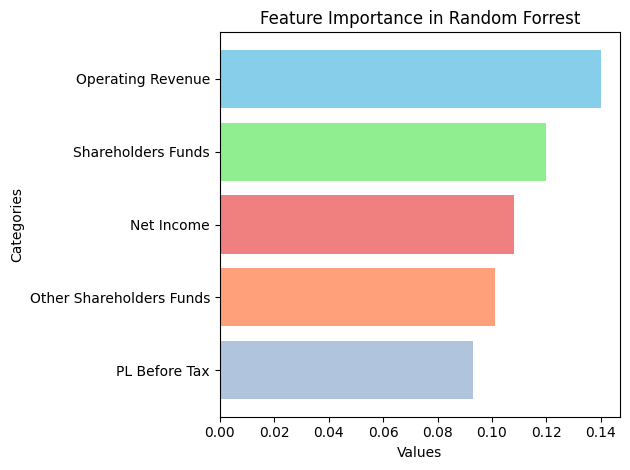

In [117]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
style.use('default')

# Data
categories = ('Operating Revenue', 'Shareholders Funds', 'Net Income', 'Other Shareholders Funds', 'PL Before Tax')
values = (0.14, 0.12, 0.108, 0.101, 0.093)
y_pos = np.arange(len(categories))

fig, ax = plt.subplots()

# Custom colors for each bar
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightsteelblue']

ax.barh(y_pos, values, color = colors)

ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.invert_yaxis()

# Adding labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Categories')
ax.set_title('Feature Importance in Random Forrest')

plt.tight_layout()

# Display the plot
plt.savefig('fi_rf.png', dpi=200)
plt.show()

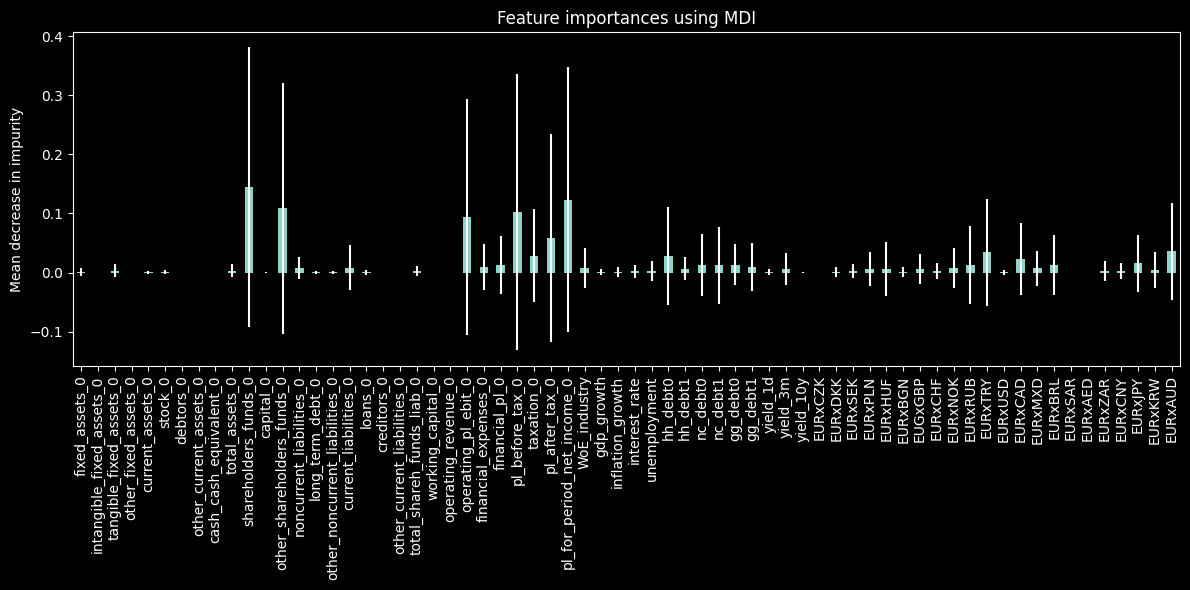

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'rf', 'data', and other variables are defined

importances = rf.steps[1][1].feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.steps[1][1].estimators_], axis=0)

forest_importances = pd.Series(importances, index=data[0].columns)

# Increase the width of the plot by adjusting the figsize
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width (12) as needed
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

plt.show()


In [30]:
data[0].columns[10]

'shareholders_funds_0'

In [35]:
# Without Interactions
xg = run_model(data, type = 'xgboost', interactions=False)
rf = run_model(data, type = 'RF', interactions=False)
f_xg = get_f_importance(xg)
f_rf = get_f_importance(rf)

Results for xgboost
------------------------------
Confussion Matrx:
 [[49881  1264]
 [  297   359]]

AUC: 0.7613
Results for RF
------------------------------
Confussion Matrx:
 [[49982  1163]
 [  301   355]]

AUC: 0.7592


IndexError: list index out of range

In [173]:
xg.steps

[('transformet', MinMaxScaler()),
 ('model', RandomForestClassifier(max_depth=3, n_estimators=50))]

### MACRO ONLY

In [14]:
data = get_train_test(macro, y)

In [15]:
logit = run_model(data, type = 'logit')

/Users/Jakub/miniconda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Results for logit
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502


In [122]:
# With Interaction
xg = run_model(data, type = 'xgboost')
rf = run_model(data, type = 'RF')
logit = run_model(data, type = 'logit')
f_xg = get_f_importance(xg)
f_rf = get_f_importance(rf)

Results for xgboost
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502
Results for RF
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502


In [189]:
logit = run_model(data, type = 'logit')

Results for logit
------------------------------
Confussion Matrx:
 [[50822   323]
 [  476   180]]

AUC: 0.634


In [198]:
# Without Interactions
xg = run_model(data, type = 'xgboost', interactions=False)
rf = run_model(data, type = 'RF', interactions=False)
f_xg = get_f_importance(xg)
f_rf = get_f_importance(rf)

Results for xgboost
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502
Results for RF
------------------------------
Confussion Matrx:
 [[49727  1418]
 [  572    84]]

AUC: 0.5502


AttributeError: 'MinMaxScaler' object has no attribute 'feature_importances_'

### MICRO + MACRO

In [36]:
data = get_train_test(pd.concat([micro, macro], axis = 1), y)

In [27]:
logit = run_model(data, type = 'logit')

/Users/Jakub/miniconda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for logit
------------------------------
Confussion Matrx:
 [[51067    78]
 [  613    43]]

AUC: 0.532


In [29]:
# With Interaction
xg = run_model(data, type = 'xgboost')
f_xg = get_f_importance(xg)

Results for xgboost
------------------------------
Confussion Matrx:
 [[50192   953]
 [  311   345]]

AUC: 0.7536


AttributeError: 'LogisticRegression' object has no attribute 'get_feature_names_out'

In [ ]:
# pl_for_period_net_income_0 * noncurrent_liabilities_0
# shareholders_funds_0 * other_shareholders_funds_0
# other_shareholders_funds_0 * financial_expenses_0
# financial_expenses_0 *  pl_after_tax_0
# financial_expenses_0^2

In [335]:
rf = run_model(data, type = 'RF')
#f_rf = get_f_importance(rf)

KeyboardInterrupt: 

In [39]:
# Without Interactions
xg = run_model(data,n_estimators=500, max_depth=6, type = 'xgboost', interactions=False)
rf = run_model(data, n_estimators=100, max_depth=6,  type = 'RF', interactions=False)
f_xg = get_f_importance(xg)
f_rf = get_f_importance(rf)

Results for xgboost
------------------------------
Confussion Matrx:
 [[50441   704]
 [  341   315]]

AUC: 0.7332
Results for RF
------------------------------
Confussion Matrx:
 [[50410   735]
 [  338   318]]

AUC: 0.7352


IndexError: list index out of range

### RATIOS

In [132]:
# We compute the ratios first and get them in one dataframe

#Liquidity ratio's
gen_liq= df['current_assets_0']/df['current_liabilities_0']
liquidity_ratio= (df['current_assets_0']-df['stock_0'])/df['current_liabilities_0']
immediate_liquidity= df['cash_cash_equivalent_0']/df['current_liabilities_0']

#Solvency ratio's
solvency_ratio = df['current_liabilities_0']/df['total_assets_0']

# NEW?
debt_ratio = (df['current_liabilities_0'] + df['noncurrent_liabilities_0'] + df['other_current_liabilities_0'] + df['other_noncurrent_liabilities_0'])/ df['total_assets_0']
debt_to_eq = (df['current_liabilities_0'] + df['noncurrent_liabilities_0'] + df['other_current_liabilities_0'] + df['other_noncurrent_liabilities_0'])/ (df['shareholders_funds_0'] + df['other_shareholders_funds_0']) #(equal to shareholder equity)?

#Profitability
economic_profit= df['pl_for_period_net_income_0']/df['total_assets_0']
financial_profit= df['pl_for_period_net_income_0']/df['shareholders_funds_0']
ROA = df['operating_pl_ebit_0']/df['total_assets_0']

# NEW? 
ROE = df['operating_pl_ebit_0'] / (df['shareholders_funds_0'] + df['other_shareholders_funds_0']) #(equal to shareholder equity)?


#Activity
stock_rotation= df['operating_revenue_0']/df['stock_0']
rev_over_assets = df['operating_revenue_0']/df['total_assets_0']

liabilities = df['total_shareh_funds_liab_0'] - df['shareholders_funds_0']

#Indebtedness
ind1= df['long_term_debt_0']/df['total_assets_0']
ind2= df['shareholders_funds_0']/liabilities
ind3= df['long_term_debt_0']/df['shareholders_funds_0']
ind4= df['long_term_debt_0']/df['current_liabilities_0']
ind5= liabilities/df['total_assets_0']
#ind6= df['operating_pl_ebit_0']/df['financial_expenses_0']
ind7= df['fixed_assets_0']/df['shareholders_funds_0']
ind8= (df['shareholders_funds_0']+ df['long_term_debt_0'])/df['total_assets_0']
ind9= (df['shareholders_funds_0']+ df['long_term_debt_0'])/df['current_liabilities_0']
ind10= (df['shareholders_funds_0']+ df['long_term_debt_0'])/liabilities

#Equilibrium
Eq1 = df['working_capital_0']/df['total_assets_0']

ratios= np.column_stack((df['index'],gen_liq, liquidity_ratio,immediate_liquidity, solvency_ratio, economic_profit,
                    financial_profit, ROA, stock_rotation, rev_over_assets, 
                     ind1, ind2, ind3, ind4, ind5, ind7, ind8, 
                     ind9, ind10,Eq1))

ratios= pd.DataFrame(ratios, columns = ['index','gen_liq', 'liq_ratio', 'imm_liq', 'solvency', 'economic_profit', 'financial_profit',
                                   'ROA','stock_rotation','rev_over_assets','ind1','ind2','ind3','ind4','ind5','ind7','ind8','ind9','ind10','Eq1'])


# current_assets_0/current_liabilities_0
# cash_cash_equivalent_0/current_liabilities_0
# (current_assets_0-stock_0)/current_liabilities_0
# shareholders_funds_0/noncurrent_liabilities_0
# shareholders_funds_0/ (shareholders_funds_0 +noncurrent_liabilities_0)
# current_liabilities_0/total_assets_0
# pl_for_period_net_income_0/total_assets_0
# (pl_for_period_net_income_0/shareholders_funds_0)*100
# operating_pl_ebit_0/(shareholders_funds_0+noncurrent_liabilities_0) * 100
# operating_pl_ebit_0/total_assets * 100
# operating_pl_ebit_/operating_revenue_0
# operating_pl_ebit/financial_expenses_0 ??
# operating_revenue_0/total_assets?
# long_term_debt_0/total_assets_0

# Merge it with company information
full_data = pd.merge(df,ratios,on= 'index')
full_data = full_data.replace([np.nan, -np.inf, np.inf], 0) # replace problematic values with zeroes

In [133]:
full_data

,level_0,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,...,ind1,ind2,ind3,ind4,ind5,ind7,ind8,ind9,ind10,Eq1
0,9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,...,0.000000,0.399140,0.000000,0.000000,0.714725,1.550852,0.285275,0.428024,0.399140,-0.412451
1,758,7020575,IT00965950496,IT,C,SME,2006,16991231,non_default,0,...,0.240024,0.354825,0.916482,0.531199,0.738103,1.411822,0.501921,1.110806,0.680015,0.410481
2,1411,7047993,IT01338530353,IT,N,SME,2006,16991231,non_default,0,...,0.042515,0.146421,0.332876,0.051703,0.872280,0.359347,0.170235,0.207025,0.195161,0.420777
3,1952,7025523,IT05711140581,IT,I,SME,2006,16991231,non_default,0,...,0.090018,1.988329,0.135290,0.749473,0.334635,1.296771,0.755382,6.289203,2.257330,0.022507
4,1994,7035105,IT00126400407,IT,H,SME,2006,16991231,non_default,0,...,0.012216,1.872339,0.018741,0.042940,0.348148,0.915956,0.664068,2.334141,1.907429,0.163810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258996,1521233,360436220,IT01115500371,IT,C,SME,2001,16991231,non_default,0,...,0.804869,-0.347386,-1.512059,1.167239,1.532300,-1.015594,0.272569,0.395286,0.177882,0.164171
258997,1521276,360430514,IT00948190582,IT,N,SME,2001,16991231,non_default,0,...,0.000000,0.018984,0.000000,0.000000,0.981370,12.950362,0.018630,0.020406,0.018984,-0.571217
258998,1521946,360440242,IT00955960430,IT,C,SME,2001,16991231,non_default,0,...,0.000000,0.055194,0.000000,0.000000,0.947693,2.746389,0.052307,0.087475,0.055194,0.360350
258999,1524290,375365529,IT06589831004,IT,F,SME,2001,16991231,non_default,0,...,0.000000,0.799390,0.000000,0.000000,0.555744,0.582426,0.444256,0.799395,0.799390,0.354208


In [134]:
Y = full_data['default_indicator']
X = full_data.iloc[:,40:]

In [138]:
X = pd.concat([X, micro['WoE_industry']], axis = 1)

In [139]:
X

,gdp_growth,inflation_growth,interest_rate,unemployment,hh_debt0,hh_debt1,nc_debt0,nc_debt1,gg_debt0,gg_debt1,...,ind2,ind3,ind4,ind5,ind7,ind8,ind9,ind10,Eq1,WoE_industry
0,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,0.399140,0.000000,0.000000,0.714725,1.550852,0.285275,0.428024,0.399140,-0.412451,-0.180861
1,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,0.354825,0.916482,0.531199,0.738103,1.411822,0.501921,1.110806,0.680015,0.410481,-0.180861
2,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,0.146421,0.332876,0.051703,0.872280,0.359347,0.170235,0.207025,0.195161,0.420777,-0.180861
3,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,1.988329,0.135290,0.749473,0.334635,1.296771,0.755382,6.289203,2.257330,0.022507,-0.180861
4,1.790640,2.090844,5.621779,6.777,48.195001,35.696160,114.279623,69.556988,100.768188,106.739678,...,1.872339,0.018741,0.042940,0.348148,0.915956,0.664068,2.334141,1.907429,0.163810,-0.180861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258996,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,-0.347386,-1.512059,1.167239,1.532300,-1.015594,0.272569,0.395286,0.177882,0.164171,-0.162824
258997,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,0.018984,0.000000,0.000000,0.981370,12.950362,0.018630,0.020406,0.018984,-0.571217,-0.162824
258998,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,0.055194,0.000000,0.000000,0.947693,2.746389,0.052307,0.087475,0.055194,0.360350,-0.162824
258999,1.951372,2.785165,7.287750,9.599,35.627699,23.948711,98.011635,58.833466,105.601220,108.886307,...,0.799390,0.000000,0.000000,0.555744,0.582426,0.444256,0.799395,0.799390,0.354208,-0.162824


In [140]:
data = get_train_test(X, Y)

In [141]:
# With Interaction
xg = run_model(data, type = 'xgboost')
rf = run_model(data, type = 'rf')
f_xg = get_f_importance(xg)
f_rf = get_f_importance(rf)

Results for xgboost
------------------------------
Confussion Matrx:
 [[50147   998]
 [  301   355]]

AUC: 0.7608
Results for rf
------------------------------
Confussion Matrx:
 [[50119  1026]
 [  306   350]]

AUC: 0.7567


In [ ]:
# RF

# ind5
# economic_profit^2
# economic_profit * ind8
# ROA * ind8
# ind5 * ind*

In [ ]:
# XG

# economic_profit^2
# economic_profit * ind8
# economic_profit * ROA
# economic_profit * ind5
# ROA* ind5

In [122]:
# Without Interactions
run_model(data, type = 'xgboost', interactions=False)
run_model(data, type = 'rf', interactions=False)
f_xg = get_f_importance(xg)
f_rf = get_f_importance(rf)

Results for xgboost
------------------------------
Confussion Matrx:
 [[59233   916]
 [  365   326]]

AUC: 0.7283
Results for rf
------------------------------
Confussion Matrx:
 [[59449   700]
 [  378   313]]

AUC: 0.7207


Pipeline(steps=[('transformet', MinMaxScaler()),
                ('model',
                 RandomForestClassifier(max_depth=3, n_estimators=50))])

# A + B = C

In [2]:
import pandas as pd

In [3]:
data = pd.read_pickle('Erasmus_data_stresstesting_2024.pickle')
country_data = data[data['country_code']== 'IT'].reset_index()

In [51]:
country_data

,level_0,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,...,cash_flow_2,cash_flow_3,added_value_0,added_value_1,added_value_2,added_value_3,ebitda_0,ebitda_1,ebitda_2,ebitda_3
0,9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,...,263278.0,286875.0,814785.0,834961.0,832154.0,767041.0,294436.0,323697.0,363494.0,313583.0
1,10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,...,286875.0,291243.0,834961.0,832154.0,767041.0,746729.0,323697.0,363494.0,313583.0,304113.0
2,11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,...,164506.0,81066.0,1313014.0,772696.0,536672.0,359550.0,890388.0,405156.0,198487.0,130466.0
3,12,7000907,IT02969620133,IT,G,SME,2017,16991231,non_default,0,...,104911.0,72156.0,536672.0,359550.0,401859.0,NaN,198487.0,130466.0,254000.0,109555.0
4,16,7003402,IT05253550965,IT,J,SME,2014,16991231,non_default,0,...,1485332.0,1690127.0,2399702.0,2711362.0,2739973.0,2992526.0,2025047.0,2282536.0,2147192.0,2429187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305519,1526917,430272630,IT00726060155,IT,C,SME,2011,16991231,non_default,1,...,NaN,159526.0,2221758.0,NaN,NaN,1808013.0,405457.0,NaN,NaN,324211.0
305520,1526923,86196217,IT01588300465,IT,G,SME,2017,16991231,non_default,0,...,50196.0,64404.0,828836.0,1215718.0,1084410.0,988039.0,-61327.0,235687.0,-15765.0,185421.0
305521,1526925,233482640,IT01998880486,IT,G,SME,2013,16991231,non_default,0,...,112773.0,268044.0,533545.0,774642.0,857024.0,934705.0,37583.0,-45904.0,56121.0,256576.0
305522,1526940,430282806,IT00735460347,IT,G,SME,2010,16991231,non_default,0,...,-1916000.0,-779517.0,919301.0,2605000.0,4131000.0,5254146.0,-786846.0,-1407000.0,32000.0,1083497.0


In [98]:
filtered_columns = [col for col in country_data.columns if all(str(num) not in col for num in range(2, 4))]


In [99]:
filtered_df_0_1 = country_data[filtered_columns]

In [64]:
filtered_df

,level_0,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,...,pl_for_period_net_income_0,export_revenue_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,research_development_expenses_0,cash_flow_0,added_value_0,ebitda_0
0,9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,...,60611.0,NaN,5502125.0,507938.0,136504.0,10463.0,NaN,197115.0,814785.0,294436.0
1,10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,...,110276.0,NaN,5191586.0,502907.0,109947.0,8737.0,NaN,220223.0,834961.0,323697.0
2,11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,...,562993.0,NaN,5095473.0,416276.0,71708.0,14449.0,NaN,634701.0,1313014.0,890388.0
3,12,7000907,IT02969620133,IT,G,SME,2017,16991231,non_default,0,...,109087.0,NaN,3533314.0,301781.0,55419.0,8288.0,NaN,164506.0,536672.0,198487.0
4,16,7003402,IT05253550965,IT,J,SME,2014,16991231,non_default,0,...,1061759.0,NaN,65006.0,362584.0,328387.0,9672.0,NaN,1390146.0,2399702.0,2025047.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305519,1526917,430272630,IT00726060155,IT,C,SME,2011,16991231,non_default,1,...,6210.0,NaN,1684879.0,1688180.0,262980.0,198422.0,NaN,269190.0,2221758.0,405457.0
305520,1526923,86196217,IT01588300465,IT,G,SME,2017,16991231,non_default,0,...,-224873.0,NaN,4041689.0,892743.0,64845.0,93346.0,NaN,-160028.0,828836.0,-61327.0
305521,1526925,233482640,IT01998880486,IT,G,SME,2013,16991231,non_default,0,...,-73872.0,NaN,7346121.0,490667.0,118972.0,6822.0,NaN,45100.0,533545.0,37583.0
305522,1526940,430282806,IT00735460347,IT,G,SME,2010,16991231,non_default,0,...,221392.0,NaN,7095099.0,475913.0,85398.0,136598.0,NaN,306790.0,919301.0,-786846.0


In [ ]:
import math

In [96]:
def a_b_c(column1, column2, column3, type = '-'):

    for i in range(filtered_df.shape[0]):
        a = filtered_df.iloc[i, :][column1]
        if type == '+':
            b = -filtered_df.iloc[i, :][column2]
        else:
            b = filtered_df.iloc[i, :][column2]
        c = filtered_df.iloc[i, :][column3]
        
        if (math.isnan(a) == math.isnan(b) == math.isnan(c)) == True:
            x = a - b - c < 5

            if x == False:
                print(f'Wrong SUM: {i}: {a}, {b}, {c}')
        else:
            print(f'Missing Val: {i}: {math.isnan(a)}, {math.isnan(b)}, {math.isnan(c)}')

In [93]:
def a_b_c_d(column1, column2, column3, column4):

    for i in range(filtered_df.shape[0]):
        a = filtered_df.iloc[i, :][column1]
        b = filtered_df.iloc[i, :][column2]
        c = filtered_df.iloc[i, :][column3]
        d = filtered_df.iloc[i, :][column4]
        
        if (math.isnan(a) == math.isnan(b) == math.isnan(c) == math.isnan(d)) == True:
            x = a - b - c - d < 5
            diff = a - b - c - d 

            if x == False:
                print(f'Wrong SUM with diff: {diff}: {i}: {a}, {b}, {c}, {d}')
        else:
            print(f'Missing Val at {i}: {math.isnan(a)}, {math.isnan(b)}, {math.isnan(c)}, {math.isnan(d)}')

In [72]:
a_b_c('pl_before_tax_0', 'taxation_0', 'pl_after_tax_0')
a_b_c('operating_pl_ebit_0', 'financial_pl_0', 'pl_before_tax_0', type = '+')
a_b_c('financial_revenue_0', 'financial_expenses_0', 'financial_pl_0')
a_b_c('shareholders_funds_0', 'capital_0', 'other_shareholder_funds_0')
a_b_c_d('current_liabilities_0', 'loans_0', 'creditors_0', 'other_current_liabilities_0')
a_b_c('noncurrent_liabilities_0', 'long_term_debt_0', 'other_noncurrent_liabilities_0')
a_b_c_d('current_assets_0', 'stock_0', 'debtors_0', 'other_current_assets_0')

In [94]:
a_b_c_d('current_assets_0', 'stock_0', 'debtors_0', 'other_current_assets_0')

Wrong SUM with diff: 1000.0: 132: 13633000.0, 6795000.0, 1690000.0, 5147000.0
Wrong SUM with diff: 7.0: 1386: 175457056.0, 161764992.0, 1117304.0, 12574753.0
Wrong SUM with diff: 10.0: 1552: 186447072.0, 173945968.0, 3741105.0, 8759989.0
Wrong SUM with diff: 6.0: 3966: 159550672.0, 143981696.0, 7859807.0, 7709163.0
Wrong SUM with diff: 8.0: 5039: 138000896.0, 95148184.0, 37532360.0, 5320344.0
Wrong SUM with diff: 5.0: 7539: 82256600.0, 79472320.0, 83739.0, 2700536.0
Wrong SUM with diff: 6.0: 14526: 87259200.0, 76474744.0, 5749441.0, 5035009.0
Missing Val at 14754: True, True, False, False
Missing Val at 14781: True, True, False, False
Wrong SUM with diff: 1000.0: 16451: 2516000.0, 45000.0, 1024000.0, 1446000.0
Missing Val at 20715: True, True, False, False
Missing Val at 21125: True, True, False, False
Missing Val at 21142: True, True, False, False
Missing Val at 21840: True, True, False, False
Missing Val at 21870: True, True, False, False
Missing Val at 21871: True, True, False, Fals

In [97]:
a_b_c('pl_before_tax_0', 'taxation_0', 'pl_after_tax_0')


Wrong SUM: 11957: 55365.0, 18952.0, 22367.0
Wrong SUM: 14430: 387684.0, -1.0, 301118.0
Missing Val: 14754: False, True, False
Missing Val: 14781: False, True, False
Wrong SUM: 15377: 90054.0, 100376.0, -16418.0
Wrong SUM: 16204: 656987.0, 92223.0, 68382.0
Wrong SUM: 17138: 205193.0, 133795.0, 49790.0
Wrong SUM: 18312: 239905.0, -1.0, 38336.0
Wrong SUM: 20402: 250992.0, -160322.0, -70246.0
Missing Val: 20715: False, True, False
Missing Val: 21125: False, True, False
Missing Val: 21142: False, True, False
Missing Val: 21840: False, True, False
Missing Val: 21870: False, True, False
Missing Val: 21871: False, True, False
Wrong SUM: 27817: 71205.0, -2.0, 37817.0
Wrong SUM: 33934: 122922.0, 83296.0, 12017.0
Missing Val: 36113: False, True, False
Wrong SUM: 36387: 22996.0, -22152.0, 844.0
Missing Val: 36975: False, True, False
Missing Val: 38185: False, True, False
Wrong SUM: 38707: -16941.0, 87682.0, -104628.0
Missing Val: 38925: False, True, False
Missing Val: 39114: False, True, False
Wro

In [100]:
filtered_df_0_1

,level_0,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,...,interest_paid_0,interest_paid_1,research_development_expenses_0,research_development_expenses_1,cash_flow_0,cash_flow_1,added_value_0,added_value_1,ebitda_0,ebitda_1
0,9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,...,10463.0,8737.0,NaN,NaN,197115.0,220223.0,814785.0,834961.0,294436.0,323697.0
1,10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,...,8737.0,7114.0,NaN,NaN,220223.0,263278.0,834961.0,832154.0,323697.0,363494.0
2,11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,...,14449.0,7399.0,NaN,NaN,634701.0,338217.0,1313014.0,772696.0,890388.0,405156.0
3,12,7000907,IT02969620133,IT,G,SME,2017,16991231,non_default,0,...,8288.0,144.0,NaN,NaN,164506.0,81066.0,536672.0,359550.0,198487.0,130466.0
4,16,7003402,IT05253550965,IT,J,SME,2014,16991231,non_default,0,...,9672.0,13730.0,NaN,NaN,1390146.0,1590698.0,2399702.0,2711362.0,2025047.0,2282536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305519,1526917,430272630,IT00726060155,IT,C,SME,2011,16991231,non_default,1,...,198422.0,NaN,NaN,NaN,269190.0,NaN,2221758.0,NaN,405457.0,NaN
305520,1526923,86196217,IT01588300465,IT,G,SME,2017,16991231,non_default,0,...,93346.0,128738.0,NaN,NaN,-160028.0,106800.0,828836.0,1215718.0,-61327.0,235687.0
305521,1526925,233482640,IT01998880486,IT,G,SME,2013,16991231,non_default,0,...,6822.0,27528.0,NaN,NaN,45100.0,110736.0,533545.0,774642.0,37583.0,-45904.0
305522,1526940,430282806,IT00735460347,IT,G,SME,2010,16991231,non_default,0,...,136598.0,1147000.0,NaN,NaN,306790.0,-2423000.0,919301.0,2605000.0,-786846.0,-1407000.0


In [4]:
data = pd.read_pickle('Erasmus_data_stresstesting_2024.pickle')

In [5]:
# Assuming your DataFrame is named df and has a column 'country'
countries_of_interest = ['FI', 'NL', 'AT', 'BE', 'SE', 'DE', 'NO', 'DK', 'IS', 'IT', 'ES', 'PT', 'LV', 'RO', 'HR', 'LT', 'BG', 'SK', 'CZ', 'SI', 'HU', 'PL']

# Subset the DataFrame based on countries of interest
subset_df = data[data['country_code'].isin(countries_of_interest)]


In [11]:
subset_df.iloc[:, :20].reset_index()

,level_0,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,...,fixed_assets_1,fixed_assets_2,fixed_assets_3,intangible_fixed_assets_0,intangible_fixed_assets_1,intangible_fixed_assets_2,intangible_fixed_assets_3,tangible_fixed_assets_0,tangible_fixed_assets_1,tangible_fixed_assets_2
0,0,396160676,DE7350012856,DE,G,SME,2020,16991231,non_default,0,...,96264.0,108382.0,100304.0,2905.0,9624.0,19364.0,29104.0,65007.0,81640.0,84018.0
1,5,448629119,ESF34251967,ES,A,SME,2021,20140104,non_default,0,...,2246.0,52258.0,69288.0,0.0,0.0,0.0,0.0,0.0,0.0,19750.0
2,9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,...,1067546.0,1093528.0,950419.0,819427.0,651498.0,672129.0,700478.0,559611.0,411048.0,416399.0
3,10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,...,1093528.0,950419.0,688927.0,651498.0,672129.0,700478.0,467160.0,411048.0,416399.0,244941.0
4,11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,...,869887.0,878699.0,904449.0,3546.0,7589.0,11945.0,26291.0,855583.0,795613.0,800069.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,1526971,430303751,IT00811420629,IT,G,SME,2006,16991231,non_default,0,...,243113.0,224492.0,NaN,24082.0,27427.0,30773.0,NaN,193549.0,215686.0,193719.0
1075922,1526972,67988054,LV010340417,LV,F,SME,2018,16991231,non_default,0,...,297564.0,351070.0,NaN,32131.0,30273.0,35730.0,NaN,5483.0,261643.0,315340.0
1075923,1526973,212124085,LV000384403,LV,G,SME,2010,16991231,non_default,0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1075924,1526974,316233678,DE2050497257,DE,L,SME,2020,16991231,non_default,0,...,20383.0,NaN,21605.0,0.0,0.0,NaN,0.0,24010.0,20383.0,NaN


In [6]:
sum(subset_df['default_indicator'])/subset_df.shape[0]

0.006265300773473269

In [7]:
subset_df.shape[0]

1075926

In [8]:
subset_df

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,fixed_assets_0,...,cash_flow_2,cash_flow_3,added_value_0,added_value_1,added_value_2,added_value_3,ebitda_0,ebitda_1,ebitda_2,ebitda_3
0,396160676,DE7350012856,DE,G,SME,2020,16991231,non_default,0,72912.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,448629119,ESF34251967,ES,A,SME,2021,20140104,non_default,0,1543.0,...,18475.0,20811.0,34323.0,40281.0,19495.0,22505.0,1086.0,11712.0,19495.0,-995.0
9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,1384038.0,...,263278.0,286875.0,814785.0,834961.0,832154.0,767041.0,294436.0,323697.0,363494.0,313583.0
10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,1067546.0,...,286875.0,291243.0,834961.0,832154.0,767041.0,746729.0,323697.0,363494.0,313583.0,304113.0
11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,925814.0,...,164506.0,81066.0,1313014.0,772696.0,536672.0,359550.0,890388.0,405156.0,198487.0,130466.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526971,430303751,IT00811420629,IT,G,SME,2006,16991231,non_default,0,217631.0,...,176641.0,NaN,594147.0,786761.0,452409.0,NaN,332896.0,559134.0,280656.0,NaN
1526972,67988054,LV010340417,LV,F,SME,2018,16991231,non_default,0,42754.0,...,NaN,NaN,NaN,NaN,NaN,NaN,410236.0,106908.0,287213.0,NaN
1526973,212124085,LV000384403,LV,G,SME,2010,16991231,non_default,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,192111.0,42807.0,117551.0,NaN
1526974,316233678,DE2050497257,DE,L,SME,2020,16991231,non_default,0,24010.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [404]:
pd.DataFrame([1, 2, 3]).to_csv('test.csv')

In [234]:
# List of columns to remove
columns_to_remove = [
    'fixed_assets_0', 'current_assets_0', 'total_assets_0', 'shareholders_funds_0', 
    'noncurrent_liabilities_0', 'current_liabilities_0', 'total_shareh_funds_liab_0', 
    'working_capital_0', 'net_current_assets_0', 'operating_revenue_0', 'financial_pl_0', 
    'pl_before_tax_0', 'pl_after_tax_0', 'pl_for_period_net_income_0', 'ebitda_0'
]



# Drop the specified columns
df = subset_df.drop(columns=columns_to_remove)

columns_to_remove = [col.replace('_0', '_1') for col in columns_to_remove]

df = df.drop(columns=columns_to_remove)


In [235]:
filtered_columns = [col for col in df.columns if all(str(num) not in col for num in range(2, 4))]


In [236]:
df = df[filtered_columns]

In [237]:
df

,index,bvd_id_number,country_code,industry_code,size_class,status_year,status_date_latest,status_latest,default_indicator,intangible_fixed_assets_0,...,depreciation_amortization_0,depreciation_amortization_1,interest_paid_0,interest_paid_1,research_development_expenses_0,research_development_expenses_1,cash_flow_0,cash_flow_1,added_value_0,added_value_1
0,396160676,DE7350012856,DE,G,SME,2020,16991231,non_default,0,2905.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,448629119,ESF34251967,ES,A,SME,2021,20140104,non_default,0,0.0,...,NaN,11282.0,1078.0,456.0,NaN,NaN,154.0,11381.0,34323.0,40281.0
9,7000375,IT00174710145,IT,C,SME,2006,16991231,non_default,0,819427.0,...,136504.0,109947.0,10463.0,8737.0,NaN,NaN,197115.0,220223.0,814785.0,834961.0
10,7000376,IT00174710145,IT,C,SME,2005,16991231,non_default,0,651498.0,...,109947.0,160501.0,8737.0,7114.0,NaN,NaN,220223.0,263278.0,834961.0,832154.0
11,7000905,IT02969620133,IT,G,SME,2019,16991231,non_default,0,3546.0,...,71708.0,57089.0,14449.0,7399.0,NaN,NaN,634701.0,338217.0,1313014.0,772696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526971,430303751,IT00811420629,IT,G,SME,2006,16991231,non_default,0,24082.0,...,33524.0,30781.0,1480.0,2079.0,NaN,NaN,215824.0,348545.0,594147.0,786761.0
1526972,67988054,LV010340417,LV,F,SME,2018,16991231,non_default,0,32131.0,...,NaN,NaN,39008.0,32506.0,NaN,NaN,NaN,NaN,NaN,NaN
1526973,212124085,LV000384403,LV,G,SME,2010,16991231,non_default,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1526974,316233678,DE2050497257,DE,L,SME,2020,16991231,non_default,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
l = []
x = [df.isna().sum() < 500_000]
for i in range(len([df.isna().sum() < 500_000][0])):
    l.append(x[0][i])
df2 = df.loc[:, l]

In [246]:
filtered_columns = [col for col in df2.columns if all(str(num) not in col for num in range(1, 4))]

In [194]:
df2[filtered_columns].iloc[1:2, 9:].to_csv('var.csv')

In [251]:
sum(df2.iloc[:, 9:].isna().sum())

12802464

In [254]:
df2[filtered_columns].iloc[:, 9:].to_csv('final_nolags.csv')

In [258]:
pd.read_csv('final_nolags.csv').iloc[:, 1:]

,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,capital_0,other_shareholders_funds_0,long_term_debt_0,...,operating_pl_ebit_0,financial_revenue_0,financial_expenses_0,taxation_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0,added_value_0
0,2905.0,65007.0,5000.0,891934.0,0.0,1359287.0,874381.0,750000.0,0.0,1245533.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,1543.0,NaN,2774780.0,NaN,NaN,9400.0,12269.0,NaN,...,1086.0,164.0,1078.0,17.0,7839497.0,33073.0,NaN,1078.0,154.0,34323.0
2,819427.0,559611.0,5000.0,269078.0,398247.0,1076976.0,924514.0,10400.0,882037.0,0.0,...,157932.0,12411.0,10463.0,99269.0,5502125.0,507938.0,136504.0,10463.0,197115.0,814785.0
3,651498.0,411048.0,5000.0,135956.0,407318.0,467706.0,434899.0,10400.0,821425.0,0.0,...,213750.0,8357.0,8737.0,103094.0,5191586.0,502907.0,109947.0,8737.0,220223.0,834961.0
4,3546.0,855583.0,66685.0,217722.0,3539335.0,1235843.0,1168075.0,200000.0,2116057.0,0.0,...,818680.0,6000.0,14099.0,247588.0,5095473.0,416276.0,71708.0,14449.0,634701.0,1313014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,24082.0,193549.0,0.0,1396975.0,106373.0,560227.0,453570.0,100000.0,1091890.0,0.0,...,299372.0,17019.0,1480.0,132611.0,5942672.0,244232.0,33524.0,1480.0,215824.0,594147.0
1075922,32131.0,5483.0,5140.0,0.0,43385.0,3122346.0,56089.0,358563.0,654060.0,0.0,...,410236.0,662.0,39008.0,89.0,NaN,NaN,NaN,39008.0,NaN,NaN
1075923,0.0,0.0,0.0,324374.0,27463.0,3214.0,60.0,2846.0,323087.0,0.0,...,192111.0,NaN,NaN,28752.0,NaN,NaN,NaN,NaN,NaN,NaN
1075924,0.0,24010.0,0.0,12874281.0,0.0,3033456.0,2847144.0,25000.0,-2241652.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [334]:
pd.read_csv('imputed_MICE_2.csv')

,Unnamed: 0,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,capital_0,other_shareholders_funds_0,...,operating_pl_ebit_0,financial_revenue_0,financial_expenses_0,taxation_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0,added_value_0
0,0,2905.0,65007.0,5000.0,8.919340e+05,0.0,1.359287e+06,8.743810e+05,750000.0,0.0,...,88310.253009,57224.200176,83356.059018,43114.905507,5.922518e+06,1.154197e+06,69480.273291,64860.806680,223430.140839,1.540783e+06
1,1,0.0,0.0,1543.0,7.730046e+05,2774780.0,1.505867e+06,6.721358e+05,9400.0,12269.0,...,1086.000000,164.000000,1078.000000,17.000000,7.839497e+06,3.307300e+04,69480.273291,1078.000000,154.000000,3.432300e+04
2,2,819427.0,559611.0,5000.0,2.690780e+05,398247.0,1.076976e+06,9.245140e+05,10400.0,882037.0,...,157932.000000,12411.000000,10463.000000,99269.000000,5.502125e+06,5.079380e+05,136504.000000,10463.000000,197115.000000,8.147850e+05
3,3,651498.0,411048.0,5000.0,1.359560e+05,407318.0,4.677060e+05,4.348990e+05,10400.0,821425.0,...,213750.000000,8357.000000,8737.000000,103094.000000,5.191586e+06,5.029070e+05,109947.000000,8737.000000,220223.000000,8.349610e+05
4,4,3546.0,855583.0,66685.0,2.177220e+05,3539335.0,1.235843e+06,1.168075e+06,200000.0,2116057.0,...,818680.000000,6000.000000,14099.000000,247588.000000,5.095473e+06,4.162760e+05,71708.000000,14449.000000,634701.000000,1.313014e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,1075921,24082.0,193549.0,0.0,1.396975e+06,106373.0,5.602270e+05,4.535700e+05,100000.0,1091890.0,...,299372.000000,17019.000000,1480.000000,132611.000000,5.942672e+06,2.442320e+05,33524.000000,1480.000000,215824.000000,5.941470e+05
1075922,1075922,32131.0,5483.0,5140.0,0.000000e+00,43385.0,3.122346e+06,5.608900e+04,358563.0,654060.0,...,410236.000000,662.000000,39008.000000,89.000000,3.732377e+05,3.951161e+06,69480.273291,39008.000000,476632.008550,5.315861e+06
1075923,1075923,0.0,0.0,0.0,3.243740e+05,27463.0,3.214000e+03,6.000000e+01,2846.0,323087.0,...,192111.000000,57224.200176,83356.059018,28752.000000,4.028302e+06,8.749544e+04,69480.273291,64860.806680,223430.140839,5.704771e+05
1075924,1075924,0.0,24010.0,0.0,1.287428e+07,0.0,3.033456e+06,2.847144e+06,25000.0,-2241652.0,...,88310.253009,57224.200176,83356.059018,43114.905507,3.848892e+06,4.703421e+05,69480.273291,64860.806680,223430.140839,6.721329e+05


In [409]:
pd.read_csv('imputed_MICE_bayesian_ridge.csv')

,Unnamed: 0,intangible_fixed_assets_0,intangible_fixed_assets_1,tangible_fixed_assets_0,tangible_fixed_assets_1,other_fixed_assets_0,other_fixed_assets_1,stock_0,stock_1,debtors_0,...,material_costs_0,material_costs_1,costs_of_employees_0,costs_of_employees_1,depreciation_amortization_0,depreciation_amortization_1,interest_paid_0,cash_flow_0,cash_flow_1,added_value_0
0,0,2905.0,9624.000000,65007.0,8.164000e+04,5000.0,5000.000000,8.919340e+05,9.047550e+05,0.0,...,5.158095e+06,4.674118e+06,1.418751e+06,1.239062e+06,96134.722236,4.018728e+05,87374.807074,392462.733889,666955.173857,1.960535e+06
1,1,0.0,0.000000,0.0,0.000000e+00,1543.0,2246.000000,1.546495e+06,5.213670e+06,2774780.0,...,7.839497e+06,8.456265e+06,3.307300e+04,2.818300e+04,83564.202904,1.128200e+04,1078.000000,154.000000,11381.000000,3.432300e+04
2,2,819427.0,651498.000000,559611.0,4.110480e+05,5000.0,5000.000000,2.690780e+05,1.359560e+05,398247.0,...,5.502125e+06,5.191586e+06,5.079380e+05,5.029070e+05,136504.000000,1.099470e+05,10463.000000,197115.000000,220223.000000,8.147850e+05
3,3,651498.0,672129.000000,411048.0,4.163990e+05,5000.0,5000.000000,1.359560e+05,1.409340e+05,407318.0,...,5.191586e+06,5.207861e+06,5.029070e+05,4.600000e+05,109947.000000,1.605010e+05,8737.000000,220223.000000,263278.000000,8.349610e+05
4,4,3546.0,7589.000000,855583.0,7.956130e+05,66685.0,66685.000000,2.177220e+05,2.113480e+05,3539335.0,...,5.095473e+06,4.372782e+06,4.162760e+05,3.436360e+05,71708.000000,5.708900e+04,14449.000000,634701.000000,338217.000000,1.313014e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,1075921,24082.0,27427.000000,193549.0,2.156860e+05,0.0,0.000000,1.396975e+06,1.076294e+06,106373.0,...,5.942672e+06,7.278689e+06,2.442320e+05,2.255810e+05,33524.000000,3.078100e+04,1480.000000,215824.000000,348545.000000,5.941470e+05
1075922,1075922,32131.0,30273.000000,5483.0,2.616430e+05,5140.0,5648.000000,0.000000e+00,0.000000e+00,43385.0,...,3.933256e+06,4.084650e+06,1.306358e+06,1.462834e+06,196702.872101,3.708686e+05,39008.000000,507374.130052,380631.223539,1.859245e+06
1075923,1075923,0.0,0.000000,0.0,0.000000e+00,0.0,0.000000,3.243740e+05,2.330610e+05,27463.0,...,4.287983e+06,3.613830e+06,1.362447e+06,1.169596e+06,255903.667520,1.833364e+05,55881.601089,357119.235116,-120673.667210,1.809687e+06
1075924,1075924,0.0,0.000000,24010.0,2.038300e+04,0.0,0.000000,1.287428e+07,8.334401e+06,0.0,...,4.280957e+06,1.009106e+07,7.011728e+05,2.313912e+06,-266546.715536,2.293152e+06,-2455.943433,311396.885453,259391.073334,1.161787e+06


In [260]:
pd.read_csv('imputed_MICE_2.csv')

,Unnamed: 0,intangible_fixed_assets_0,tangible_fixed_assets_0,other_fixed_assets_0,stock_0,debtors_0,other_current_assets_0,cash_cash_equivalent_0,capital_0,other_shareholders_funds_0,...,operating_pl_ebit_0,financial_revenue_0,financial_expenses_0,taxation_0,material_costs_0,costs_of_employees_0,depreciation_amortization_0,interest_paid_0,cash_flow_0,added_value_0
0,0,2905.0,65007.0,5000.0,8.919340e+05,0.0,1.359287e+06,8.743810e+05,750000.0,0.0,...,389726.832816,49279.919314,100235.415372,81909.319754,4.865654e+06,1.424120e+06,220218.874401,89150.607298,443968.903944,2.040318e+06
1,1,0.0,0.0,1543.0,4.870968e+06,2774780.0,2.850556e+06,-9.037840e+05,9400.0,12269.0,...,1086.000000,164.000000,1078.000000,17.000000,7.839497e+06,3.307300e+04,-174434.591971,1078.000000,154.000000,3.432300e+04
2,2,819427.0,559611.0,5000.0,2.690780e+05,398247.0,1.076976e+06,9.245140e+05,10400.0,882037.0,...,157932.000000,12411.000000,10463.000000,99269.000000,5.502125e+06,5.079380e+05,136504.000000,10463.000000,197115.000000,8.147850e+05
3,3,651498.0,411048.0,5000.0,1.359560e+05,407318.0,4.677060e+05,4.348990e+05,10400.0,821425.0,...,213750.000000,8357.000000,8737.000000,103094.000000,5.191586e+06,5.029070e+05,109947.000000,8737.000000,220223.000000,8.349610e+05
4,4,3546.0,855583.0,66685.0,2.177220e+05,3539335.0,1.235843e+06,1.168075e+06,200000.0,2116057.0,...,818680.000000,6000.000000,14099.000000,247588.000000,5.095473e+06,4.162760e+05,71708.000000,14449.000000,634701.000000,1.313014e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075921,1075921,24082.0,193549.0,0.0,1.396975e+06,106373.0,5.602270e+05,4.535700e+05,100000.0,1091890.0,...,299372.000000,17019.000000,1480.000000,132611.000000,5.942672e+06,2.442320e+05,33524.000000,1480.000000,215824.000000,5.941470e+05
1075922,1075922,32131.0,5483.0,5140.0,0.000000e+00,43385.0,3.122346e+06,5.608900e+04,358563.0,654060.0,...,410236.000000,662.000000,39008.000000,89.000000,3.541036e+06,1.346782e+06,239026.557048,39008.000000,536981.359333,1.923791e+06
1075923,1075923,0.0,0.0,0.0,3.243740e+05,27463.0,3.214000e+03,6.000000e+01,2846.0,323087.0,...,192111.000000,-163232.880575,-20797.633536,28752.000000,4.156759e+06,1.344067e+06,312743.560512,80547.406641,363660.000619,1.818336e+06
1075924,1075924,0.0,24010.0,0.0,1.287428e+07,0.0,3.033456e+06,2.847144e+06,25000.0,-2241652.0,...,109802.046550,110811.093463,-14804.749580,47321.162398,3.125531e+06,1.198170e+06,188321.697951,162795.649631,364509.899956,1.769639e+06


In [ ]:

* change kernel
* pre select variables 
* 

In [230]:
import pandas as pd

In [231]:
data = pd.read_csv('FINAL.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.